In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io
from skimage.feature import hog
from skimage import data, color, exposure
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from PIL import Image
import numpy as np
import json
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,accuracy_score
import cv2
import glob
import os
from sklearn.model_selection import train_test_split
from imageio import imread
from skimage.transform import rescale, resize

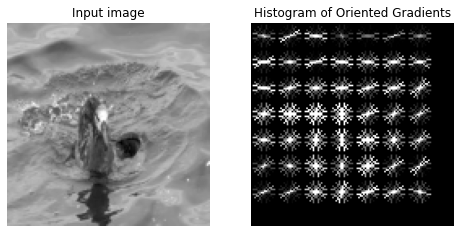

In [19]:
# Use HOG extract gradients of image
img = io.imread(r"images_256_split_train_test_bc/train/001.Black_footed_Albatross/Black_Footed_Albatross_0007_796138_256.jpg")
img = resize(img,(125,125,3))
image = color.rgb2gray(img)
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(4, 4), visualize=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box')
plt.show()

In [22]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

In [23]:
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

In [24]:
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box')
plt.show()

In [37]:
# HOG + SVM and SVM
df = pd.read_csv('CUB_200_20111/classes.txt', header=None)
df.columns = ['Category']
df['Category'] = df['Category'].str.split(' ').str[1]

In [33]:
# pixel for SVM and save them inside the dataframe
Categories=list(df['Category'])
flat_data_arr=[] 
target_arr=[]
datadir='images_256_split_train_test_bc/train'
for i in Categories:
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array= imread(os.path.join(path,img))
        img_resized= resize(img_array,(50,50,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
x= round(df.iloc[:,:-1],1)
y=df.iloc[:,-1]

In [34]:
df

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.773255,0.785020,0.820314,0.789412,0.801176,0.836471,0.807843,0.819608,0.854902,0.811529,...,0.827823,0.803051,0.806973,0.826580,0.800278,0.804199,0.823807,0.796314,0.800235,0.819843
1,0.791451,0.799294,0.795373,0.784036,0.791879,0.787958,0.761647,0.769490,0.765569,0.762060,...,0.771137,0.787129,0.794973,0.791051,0.792392,0.800235,0.796314,0.796078,0.803922,0.800000
2,0.545768,0.545768,0.553611,0.658039,0.658039,0.665882,0.658039,0.658039,0.665882,0.658039,...,0.577118,0.541490,0.545176,0.575678,0.545412,0.545412,0.581840,0.453412,0.460577,0.469347
3,0.234588,0.430431,0.673112,0.222588,0.406003,0.649569,0.193490,0.361176,0.604078,0.153569,...,0.735785,0.284243,0.495773,0.703380,0.266709,0.475216,0.685846,0.377412,0.588941,0.796784
4,0.510275,0.549490,0.537725,0.510275,0.549490,0.537725,0.510510,0.549725,0.537961,0.521548,...,0.498275,0.478667,0.520463,0.501961,0.478667,0.517882,0.501961,0.474745,0.517647,0.498039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,0.317647,0.427451,0.200000,0.329412,0.439216,0.211765,0.333333,0.443137,0.215686,0.337118,...,0.211765,0.325490,0.415686,0.211765,0.325297,0.415493,0.211572,0.317647,0.407843,0.203922
5990,0.407843,0.443137,0.219608,0.407843,0.443137,0.219608,0.403851,0.439145,0.215616,0.398216,...,0.276253,0.547137,0.489020,0.480063,0.697611,0.634588,0.672990,0.629975,0.587544,0.543715
5991,0.407843,0.568627,0.741176,0.407843,0.568627,0.741176,0.407843,0.568627,0.741176,0.411765,...,0.741176,0.407843,0.568627,0.741176,0.407843,0.568627,0.741176,0.407843,0.568627,0.741176
5992,0.388706,0.361020,0.298275,0.351016,0.331373,0.267529,0.329090,0.244941,0.269647,0.463117,...,0.301725,0.403922,0.482518,0.307286,0.392863,0.493412,0.333098,0.380627,0.498039,0.317882


In [35]:
# get the first 1000 as sample data
x = x[:1000]
y = y[:1000]

In [38]:
image_lis = []
cate = []
for types in df['Category']:
    images = [cv2.imread(file) for file in glob.glob("images_256_split_train_test_bc/train/" + types + "/*.jpg")]
    for file in glob.glob("images_256_split_train_test_bc/train/" + types + "/*.jpg"):
        im = cv2.imread(file)
        im = resize(im,(60,60,3))
        image_lis.append(im)
    for j in range(len(images)):
        cate.append(types)
col = {}
col['category'] = cate
col['images'] = image_lis
dataset = pd.DataFrame(col)
data = np.array(dataset['images'])
data_gray = [color.rgb2gray(i) for i in data]

In [39]:
labels =  np.array(dataset['category'])
le = LabelEncoder()
dataset['category'] = le.fit_transform(labels)

In [40]:
labels = labels.reshape(len(labels),1)

In [4]:
# HOG + SVM
df = pd.read_csv('CUB_200_20111/classes.txt', header=None)
df.columns = ['Category']
df['Category'] = df['Category'].str.split(' ').str[1]
image_lis = []
cate = []
for types in df['Category']:
    images = [cv2.imread(file) for file in glob.glob("images_256_split_train_test_bc/train/" + types + "/*.jpg")]
    for file in glob.glob("images_256_split_train_test_bc/train/" + types + "/*.jpg"):
        im = cv2.imread(file)
        # test different picture as with values 512x512, 256x256, 125x125, 100x100
        im = resize(im,(125,125,3))
        image_lis.append(im)
    for j in range(len(images)):
        cate.append(types)
col = {}
col['category'] = cate
col['images'] = image_lis
dataset = pd.DataFrame(col)
data = np.array(dataset['images'])

In [16]:
# HOG + SVM
ppc = 16 #test window size with values 8, 16, 20, 25
hog_images = []
hog_features = []
for image in data:
    # test orentation with values 4, 8, 16, 32
    fd,hog_image = hog(image, orientations=16, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)
labels =  np.array(dataset['category'])
le = LabelEncoder()
dataset['category'] = le.fit_transform(labels)    
labels = labels.reshape(len(labels),1)

clf = svm.SVC()
hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,labels))
np.random.shuffle(data_frame)
percentage = 80
partition = int(len(hog_features)*percentage/100)
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()
clf.fit(x_train,y_train)

SVC()

In [17]:
y_pred = clf.predict(x_test)

In [18]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))

Accuracy: 0.03502919099249374


In [20]:
# HOG + SVM hyper
# save all accuracy after testing different hyper parameter 
# # with 125 as default pitcure size
window_size_acc = {'8': 0.023, '16': 0.035, '20': 0.029, '25': 0.026}
# with 16 as default 
picture_size_acc = {'512': 0.018,'256': 0.02, '125': 0.032, '100': 0.04}
# feature vectors
picture_size_fv = {'512': 8192, '256': 2048, '125': 392, '100': 288}
# with 16 window size and 125 picture size
orentation_acc = {'4': 0.035, '8': 0.032, '16': 0.0325, '32': 0.033}


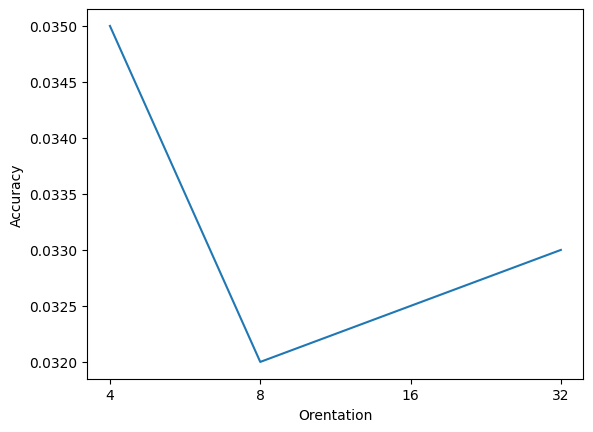

In [29]:
fv = orentation_acc.items() # sorted by key, return a list of tuples
x, y = zip(*fv) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.xlabel('Orentation')
plt.ylabel('Accuracy')

plt.show()

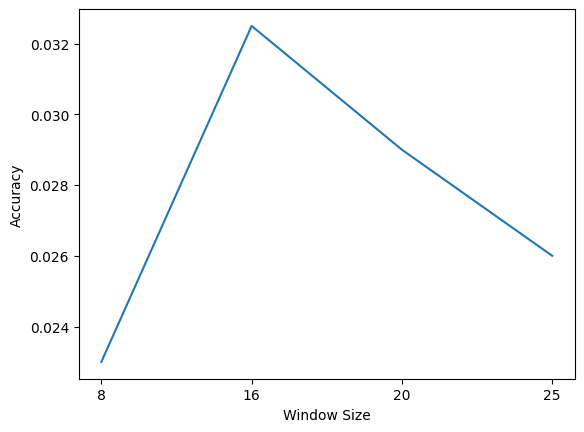

In [28]:
fv = window_size_acc.items() # sorted by key, return a list of tuples
x, y = zip(*fv) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.xlabel('Window Size')
plt.ylabel('Accuracy')
plt.show()

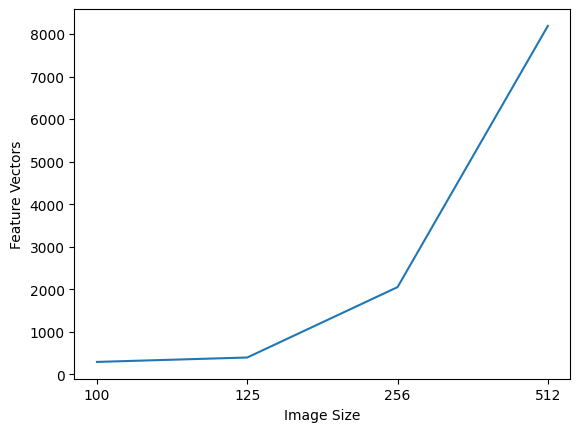

In [25]:
fv = sorted(picture_size_fv.items()) # sorted by key, return a list of tuples
x, y = zip(*fv) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.xlabel('Image Size')
plt.ylabel('Feature Vectors')
plt.show()

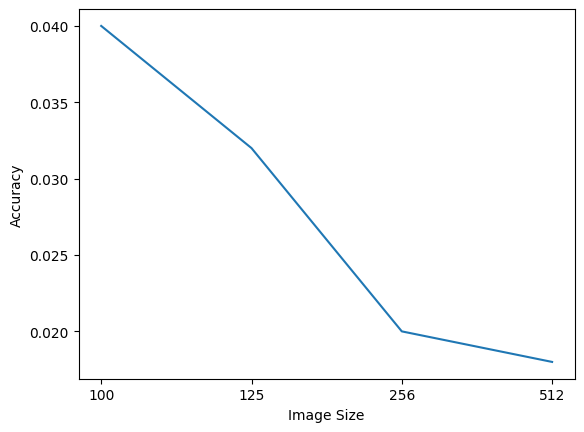

In [26]:
fv = sorted(picture_size_acc.items()) # sorted by key, return a list of tuples
x, y = zip(*fv) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.xlabel('Image Size')
plt.ylabel('Accuracy')
plt.show()

In [47]:
# test different hyper parameter with different values
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50,random_state=80,stratify=y)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 11.600000000000001% accurate


In [64]:
# simply SVM hyper and use above code to record accuracy
# with 256 pitcure size
gamma_train_acc = {'auto': 0.917, 'scale': 0.94}
gamma_test_acc = {'auto': 0.612, 'scale': 0.59}
C_train_acc = {'0.1':0.64,'1': 0.808, '2': 0.917, '10': 0.955, '100': 0.99}
C_test_acc = {'0.1': 0.47,'1': 0.569, '2':0.612, '10': 0.629, '100': 0.64}
kernel_train_acc = {'rbf':0.917, 'poly': 0.32, 'linear': 1.0, 'sigmoid': 0.69}
kernel_test_acc = {'rbf': 0.612, 'poly': 0.17,'linear': 0.638, 'sigmoid': 0.56}
decision_fun_shape_train_acc = {'ovr': 0.808, 'ovo': 0.808}
decision_fun_shape_test_acc = {'ovr': 0.569, 'ovo': 0.569 }

In [54]:
df1 = pd.DataFrame(gamma_train_acc, index = range(1))
df2 = pd.DataFrame(gamma_test_acc, index = range(1))
a = pd.concat([df1,df2], axis = 0)
a['index'] = ['Train_acc','Test_acc']
a.reset_index(drop = True)
a.style.set_table_attributes("style='display:inline'").set_caption('Gamma effect')

,auto,scale,index
0,0.917000,0.940000,Train_acc
0,0.612000,0.590000,Test_acc


In [61]:
df1 = pd.DataFrame(C_train_acc, index = range(1))
df2 = pd.DataFrame(C_test_acc, index = range(1))
a = pd.concat([df1,df2], axis = 0)
a = pd.concat([df1,df2], axis = 0)
a['index'] = ['Train_acc','Test_acc']
a.reset_index(drop = True)
a.style.set_table_attributes("style='display:inline'").set_caption('C effect')

,0.1,1,2,10,100,index
0,0.640000,0.808000,0.917000,0.955000,0.990000,Train_acc
0,0.470000,0.569000,0.612000,0.629000,0.640000,Test_acc


In [65]:
df1 = pd.DataFrame(kernel_train_acc, index = range(1))
df2 = pd.DataFrame(kernel_test_acc, index = range(1))
a = pd.concat([df1,df2], axis = 0)
a = pd.concat([df1,df2], axis = 0)
a['index'] = ['Train_acc','Test_acc']
a.reset_index(drop = True)
a.style.set_table_attributes("style='display:inline'").set_caption('Kernal effect')

,rbf,poly,linear,sigmoid,index
0,0.917000,0.320000,1.000000,0.690000,Train_acc
0,0.612000,0.170000,0.638000,0.560000,Test_acc


In [63]:
df1 = pd.DataFrame(decision_fun_shape_train_acc, index = range(1))
df2 = pd.DataFrame(decision_fun_shape_test_acc, index = range(1))
a = pd.concat([df1,df2], axis = 0)
a = pd.concat([df1,df2], axis = 0)
a['index'] = ['Train_acc','Test_acc']
a.reset_index(drop = True)
a.style.set_table_attributes("style='display:inline'").set_caption('Decision function shape effect')

,ovr,ovo,index
0,0.808000,0.808000,Train_acc
0,0.569000,0.569000,Test_acc
